In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')

from sklearn import metrics

In [18]:
data = pd.read_csv('../data/bus_running_time_all_features.csv')
features =  ['deviceid','week_no','segment','length',
            'rt(n-1)','rt(n-2)', 'rt(n-3)','rt(t-1)', 'rt(t-2)', 'rt(w-1)', 'rt(w-2)', 'rt(w-3)', 'dt(n-1)','max_elevation','avg_elevation',
'total_poi_count', 'average_poi_distance','segment_gradient_average', 'stop_to_stop_gradient','significant_bend_count','run_time_in_seconds']
df = data[features]

,deviceid,week_no,segment,length,rt(n-1),rt(n-2),rt(n-3),rt(t-1),rt(t-2),rt(w-1),...,rt(w-3),dt(n-1),max_elevation,avg_elevation,total_poi_count,average_poi_distance,segment_gradient_average,stop_to_stop_gradient,significant_bend_count,run_time_in_seconds
0,262.0,1.0,1.0,0.6261,96.0,96.0,96.0,96.0,96.0,96.0,...,96.0,0.0,532.0,511.650000,16,0.002356,0.004662,0.079618,2.0,69.0
1,262.0,1.0,2.0,1.2808,69.0,247.0,247.0,247.0,247.0,247.0,...,247.0,74.0,532.0,529.500000,19,0.006437,0.015948,-0.007985,7.0,210.0
2,262.0,1.0,3.0,2.1125,210.0,69.0,506.0,506.0,506.0,506.0,...,506.0,0.0,544.0,529.100000,13,0.003714,-0.011355,-0.004628,11.0,496.0
3,262.0,1.0,4.0,1.5513,496.0,210.0,69.0,192.0,192.0,192.0,...,192.0,6.0,527.0,515.714286,7,0.007617,0.008623,-0.010950,4.0,195.0
4,262.0,1.0,5.0,0.8450,195.0,496.0,210.0,114.0,114.0,114.0,...,114.0,0.0,488.0,480.333333,6,0.003597,-0.040850,-0.050612,2.0,97.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200562,262.0,42.0,30.0,2.5600,211.0,140.0,169.0,619.0,417.0,693.0,...,417.0,15.0,527.0,517.000000,10,0.009066,0.030476,0.035245,6.0,318.0
200563,262.0,42.0,31.0,0.4200,318.0,211.0,140.0,55.0,58.0,45.0,...,53.0,15.0,544.0,532.200000,10,0.002430,0.016321,0.032061,0.0,44.0
200564,262.0,42.0,32.0,1.3000,44.0,318.0,211.0,229.0,193.0,143.0,...,225.0,15.0,541.0,539.250000,12,0.003530,-0.013985,-0.028733,6.0,154.0
200565,262.0,42.0,33.0,1.2200,154.0,44.0,318.0,200.0,200.0,207.0,...,179.0,0.0,529.0,525.200000,13,0.003914,-0.004082,0.000000,5.0,242.0


In [27]:
train_data = df[df["week_no"]<36]
test_data = df[(df["week_no"]==42) & (df["deviceid"]==262) ]
test_data = test_data.loc[170376:170390]

In [28]:

scaler = StandardScaler()
pca = PCA(n_components=16)
train_data.pop('run_time_in_seconds')
test_data.reset_index(drop = True, inplace = True)
test_data = test_data.drop("week_no",axis = 1)
train_data = train_data.drop("week_no",axis = 1)
scaled_train_data = scaler.fit_transform(train_data)
pca.fit(scaled_train_data)

PCA(n_components=16)

In [29]:
comp_features = ['deviceid','week_no','day_of_week','time_of_day','Sunday/holiday','saturday','segment','length','precip','temp',
            'rt(n-1)','rt(n-2)', 'rt(n-3)','rt(t-1)', 'rt(t-2)', 'rt(w-1)', 'rt(w-2)', 'rt(w-3)', 'dt(n-1)','run_time_in_seconds']

comp_train_data = df[df["week_no"]<36]
comp_test_data = df[(df["week_no"]==42) & (df["deviceid"]==262) ]
comp_test_data = comp_test_data.loc[170376:170390]

In [30]:
comp_test_data

,deviceid,week_no,segment,length,rt(n-1),rt(n-2),rt(n-3),rt(t-1),rt(t-2),rt(w-1),...,rt(w-3),dt(n-1),max_elevation,avg_elevation,total_poi_count,average_poi_distance,segment_gradient_average,stop_to_stop_gradient,significant_bend_count,run_time_in_seconds
170376,262.0,42.0,1.0,0.63,105.0,105.0,105.0,105.0,105.0,105.0,...,105.0,0.0,532.0,511.650000,16,0.002356,0.004662,0.079618,2.0,93.0
170377,262.0,42.0,2.0,1.28,93.0,242.0,242.0,242.0,242.0,242.0,...,242.0,15.0,532.0,529.500000,19,0.006437,0.015948,-0.007985,7.0,164.0
170378,262.0,42.0,3.0,2.11,164.0,93.0,439.0,439.0,439.0,439.0,...,439.0,26.0,544.0,529.100000,13,0.003714,-0.011355,-0.004628,11.0,311.0
170379,262.0,42.0,4.0,1.55,311.0,164.0,93.0,216.0,216.0,216.0,...,216.0,0.0,527.0,515.714286,7,0.007617,0.008623,-0.010950,4.0,177.0
170380,262.0,42.0,5.0,0.84,177.0,311.0,164.0,128.0,128.0,128.0,...,128.0,0.0,488.0,480.333333,6,0.003597,-0.040850,-0.050612,2.0,103.0
170381,262.0,42.0,6.0,1.31,103.0,177.0,311.0,402.0,402.0,402.0,...,402.0,32.0,468.0,450.000000,9,0.003205,0.013180,0.018455,7.0,545.0
170382,262.0,42.0,7.0,0.37,545.0,103.0,177.0,56.0,56.0,56.0,...,38.0,2.0,480.0,472.555556,9,0.002209,0.033515,0.041923,1.0,40.0
170383,262.0,42.0,8.0,0.62,40.0,545.0,103.0,89.0,89.0,89.0,...,88.0,7.0,485.0,481.833333,13,0.003134,-0.004439,0.001843,3.0,63.0
170384,262.0,42.0,9.0,0.26,63.0,40.0,545.0,35.0,35.0,35.0,...,24.0,15.0,494.0,487.833333,11,0.001707,0.031515,0.039732,1.0,21.0
170385,262.0,42.0,10.0,1.23,21.0,63.0,40.0,195.0,195.0,195.0,...,195.0,15.0,494.0,489.333333,11,0.005958,0.015045,0.002517,3.0,127.0


In [31]:
comp_scaler = StandardScaler()
comp_pca = PCA(n_components=16)
comp_train_data.pop('run_time_in_seconds')
comp_test_data.reset_index(drop = True, inplace = True)
comp_test_data = comp_test_data.drop("week_no",axis = 1)
comp_train_data = comp_train_data.drop("week_no",axis = 1)

comp_scaled_train_data = comp_scaler.fit_transform(comp_train_data)
comp_pca.fit(comp_scaled_train_data)

PCA(n_components=16)

In [32]:
model = xgb.XGBRegressor()

In [33]:
comp_model = xgb.XGBRegressor()

In [34]:
model.load_model('../models/run_time_model_improved.json')

In [35]:
comp_model.load_model('../models/run_time_model_initial.json')

(15, 20)


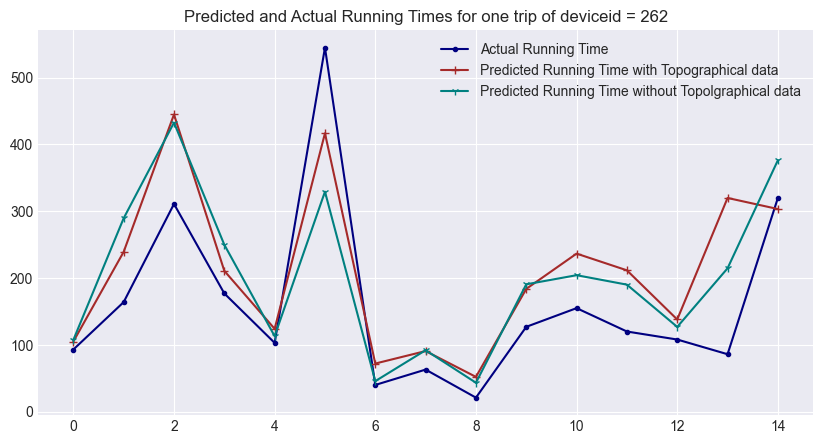

In [72]:
test_set = test_data
test_set.reset_index(drop = True, inplace = True)
comp_test_set = comp_test_data
comp_test_set.reset_index(drop = True, inplace = True)
print(test_set.shape)
X_test_set = test_set.copy()
y_test_set = X_test_set.pop('run_time_in_seconds')
X_test_set_scaled = scaler.transform(X_test_set)
X_test_set_pca = pca.transform(X_test_set_scaled)


comp_X_test_set = comp_test_set.copy()
comp_y_test_set = comp_X_test_set.pop('run_time_in_seconds')
comp_X_test_set_scaled = comp_scaler.transform(comp_X_test_set)
comp_X_test_set_pca = comp_pca.transform(comp_X_test_set_scaled)


predictions = model.predict(X_test_set_pca)
comp_predictions = comp_model.predict(comp_X_test_set_pca)

mse = metrics.mean_squared_error(y_test_set,predictions)
rmse = np.sqrt(mse)
mae = metrics.mean_absolute_error(y_test_set,predictions)
mape = metrics.mean_absolute_percentage_error(y_test_set,predictions)
r2 = metrics.r2_score(y_test_set,predictions)

comp_mse = metrics.mean_squared_error(y_test_set,comp_predictions)
comp_rmse = np.sqrt(comp_mse)
comp_mae = metrics.mean_absolute_error(y_test_set,comp_predictions)
comp_mape = metrics.mean_absolute_percentage_error(y_test_set,comp_predictions)
comp_r2 = metrics.r2_score(y_test_set,comp_predictions)

performance = [rmse,mae,mape,r2]
comp_performance = [comp_rmse,comp_mae,comp_mape,comp_r2]
plt.figure(figsize=[10,5])
plt.plot(y_test_set, label = 'Actual Running Time', color = "navy", marker = ".")
plt.plot(predictions, label = 'Predicted Running Time with Topographical data',color = "brown",marker = "+")
plt.plot(comp_predictions, label = 'Predicted Running Time without Topolgraphical data',color = "teal", marker ="1")
plt.title("Predicted and Actual Running Times for one trip of deviceid = 262")
plt.legend()
    


    

Text(0.5, 1.0, 'Distribution of Run Time')

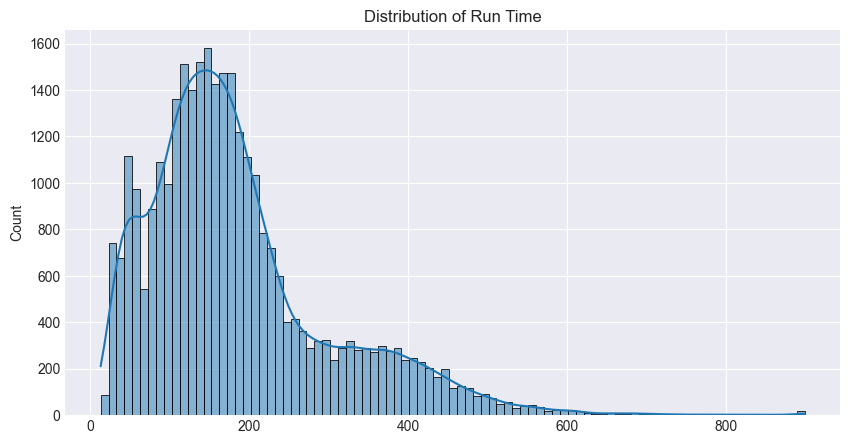

In [69]:
act_run = pd.read_csv("../data/actual_running_time.csv")
import seaborn as sns
plt.figure(figsize=[10,5])
sns.histplot(data=act_run,bins=10,binwidth=10,legend=False, kde=True)
plt.title("Distribution of Run Time")

In [ ]:
performance = dict()
comp_performance = dict()
fig = plt.figure()
fig ,ax = plt.subplots(15,figsize = (60,80))
for i in range(1,16):
    test_set = test_data[test_data['segment']==i]
    test_set.reset_index(drop = True, inplace = True)
    comp_test_set = comp_test_data[comp_test_data['segment']==i]
    comp_test_set.reset_index(drop = True, inplace = True)
    print(test_set.shape)
    X_test_set = test_set.copy()
    y_test_set = X_test_set.pop('run_time_in_seconds')
    X_test_set_scaled = scaler.transform(X_test_set)
    X_test_set_pca = pca.transform(X_test_set_scaled)


    comp_X_test_set = comp_test_set.copy()
    comp_y_test_set = comp_X_test_set.pop('run_time_in_seconds')
    comp_X_test_set_scaled = comp_scaler.transform(comp_X_test_set)
    comp_X_test_set_pca = comp_pca.transform(comp_X_test_set_scaled)


    predictions = model.predict(X_test_set_pca)
    comp_predictions = comp_model.predict(comp_X_test_set_pca)

    mse = metrics.mean_squared_error(y_test_set,predictions)
    rmse = np.sqrt(mse)
    mae = metrics.mean_absolute_error(y_test_set,predictions)
    mape = metrics.mean_absolute_percentage_error(y_test_set,predictions)
    r2 = metrics.r2_score(y_test_set,predictions)

    comp_mse = metrics.mean_squared_error(y_test_set,comp_predictions)
    comp_rmse = np.sqrt(comp_mse)
    comp_mae = metrics.mean_absolute_error(y_test_set,comp_predictions)
    comp_mape = metrics.mean_absolute_percentage_error(y_test_set,comp_predictions)
    comp_r2 = metrics.r2_score(y_test_set,comp_predictions)

    performance['segment ' + str(i)] = [rmse,mae,mape,r2]
    comp_performance['segment ' + str(i)] = [comp_rmse,comp_mae,comp_mape,comp_r2]
    
    ax[i-1].plot(y_test_set, label = 'Actual Running Time', color = "blue", marker = ".")
    ax[i-1].plot(predictions, label = 'Predicted Running Time with Topological data',color = "red",marker = "+")
    ax[i-1].plot(comp_predictions, label = 'Predicted Running Time without Topological data',color = "green", marker ="1")
    ax[i-1].set_xlim(0)
    ax[i-1].legend()
    


    

In [41]:
performance_summary = pd.DataFrame.from_dict(performance)
performance_summary.rename(index = {0:'rmse',1:'mae',2:'mape',3:'r2'},inplace= True)


In [42]:
performance_summary

,segment 1,segment 2,segment 3,segment 4,segment 5,segment 6,segment 7,segment 8,segment 9,segment 10,segment 11,segment 12,segment 13,segment 14,segment 15
rmse,34.562943,72.929921,72.055378,35.473685,26.598205,101.297870,23.695535,22.311423,12.259551,50.799575,73.549970,35.823221,35.941874,47.586717,81.465954
mae,21.917444,49.074533,56.068862,28.157762,18.265649,77.334202,17.116474,16.312113,9.231073,35.620982,55.832818,26.414610,24.204749,26.400940,50.638874
mape,0.175245,0.196621,0.135116,0.139227,0.149567,0.314631,0.325427,0.215262,0.274561,0.203957,0.306737,0.155530,0.168735,0.205714,0.141635
r2,0.046718,0.115730,0.237814,0.078290,0.010406,0.065104,-0.231690,0.015575,-0.201023,-0.075445,0.062868,0.034577,-0.048569,0.024343,0.260008


In [43]:
ps = pd.DataFrame.from_dict(comp_performance)
ps.rename(index = {0:'rmse',1:'mae',2:'mape',3:'r2'},inplace= True)

In [44]:
ps

,segment 1,segment 2,segment 3,segment 4,segment 5,segment 6,segment 7,segment 8,segment 9,segment 10,segment 11,segment 12,segment 13,segment 14,segment 15
rmse,34.733501,71.958320,70.221729,35.873640,28.821169,107.132256,23.337521,22.946059,12.454113,50.392105,73.998472,36.412746,36.608012,47.864235,82.174068
mae,22.744572,48.987700,54.296024,28.527816,20.567215,84.469531,16.697101,17.060622,10.383449,35.056815,54.916460,27.225387,25.022607,29.417609,50.722295
mape,0.182412,0.197523,0.129361,0.140846,0.171901,0.353882,0.322301,0.227111,0.337955,0.199108,0.294490,0.163028,0.175198,0.247175,0.139938
r2,0.037286,0.139134,0.276113,0.057389,-0.161918,-0.045691,-0.194752,-0.041224,-0.239446,-0.058262,0.051404,0.002541,-0.087797,0.012930,0.247088


<Figure size 640x480 with 0 Axes>

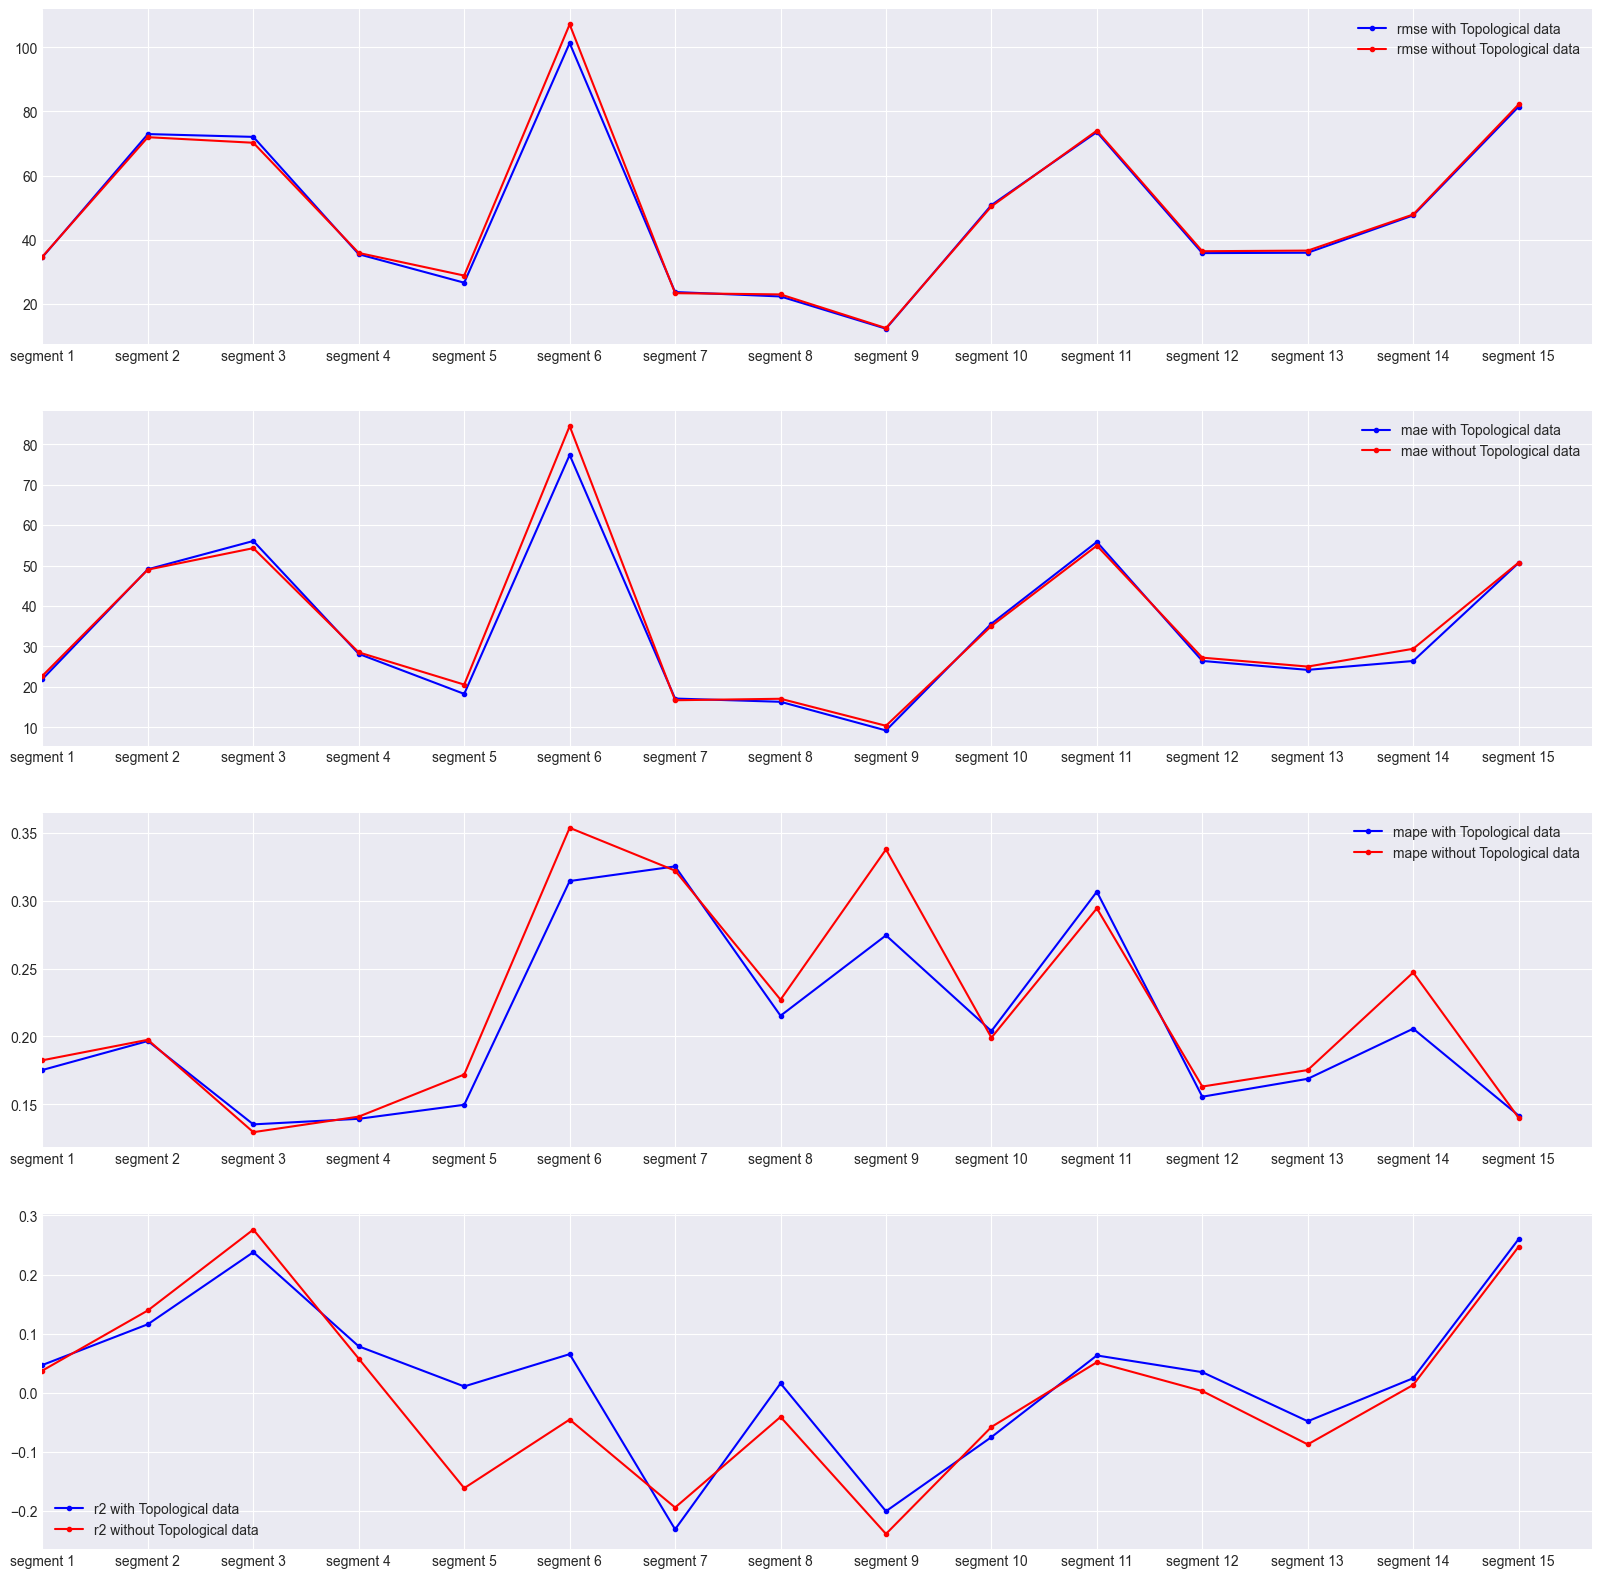

In [46]:
fig = plt.figure()
fig ,ax = plt.subplots(4,figsize = (20,20))
i =0
for metric in ['rmse','mae','mape','r2']:

    y1 = performance_summary.loc[metric]
    y2 = ps.loc[metric]
    ax[i].plot(y1, label = metric +' with Topological data',color = "blue",marker = ".")
    ax[i].plot(y2, label = metric +' without Topological data',color = "red",marker = ".")
    ax[i].set_xlim(0)
    ax[i].legend()
    i+=1